<a href="https://colab.research.google.com/github/KarsonLeperi/DataScienceProjects/blob/main/Stock_Market/RSU_Selling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RSE Stock Selling Analysis**

Background: At my current job, I receive both Restricted Stock Units (RSUs) and participate in an Employee Stock Purchase Plan (ESPP). With these regular granting of stock, I often question when is the right time to sell my stock and what price should I sell them at.

For this analysis, I will attempt to create a protocol for selling my company stock in order to maximize total returns within a 2 week time frame (10 business days) sell date.

#0) Import Libraries

I will use Yahoo Finance for collecting the daily stock data and Pandas-TA Library for calculations of my technical indicators. Other libraries will include pandas for data frame handling and matplot lib for any visualizations.

In [2]:
pip install pandas_ta

In [3]:
%matplotlib inline

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime


For my initial strategy, I will set a price at a certain percentage premium of the closing price on day 0. If the high in the 10 days is of trading (max of the high for the following 10 days) is above the premium, it is a succesful trade.

Along with just setting a premium for all trading days, I will also attempt to set different premiums based off of what momentum indicators are showing (positive, negative or neutral momentum).

For a list of momentum indicators, I used AI to get a list of the indicators and the time frames. They are:

1) Relative Strength Indicator (RSI)
2) Moving Average Convergence Divergence (MACD)
3) Stochastic Oscillator
4) Rate of Change
5) Average Directional Index (ADX)

In [4]:
from pandas_ta import rsi, macd, stoch, roc, adx

#1) Data Preparation

In [5]:
#Import Yahoo Finance Data - date range corresponds to my time at Intel while withholding recent data to allow for testing if desired
startDate = datetime.datetime(2018, 8, 6)
endDate = datetime.datetime(2025, 6, 30)
company = "INTC"

data = yf.Ticker(company).history(start = startDate, end=endDate)
data = data[['Close', 'Low', 'High']]


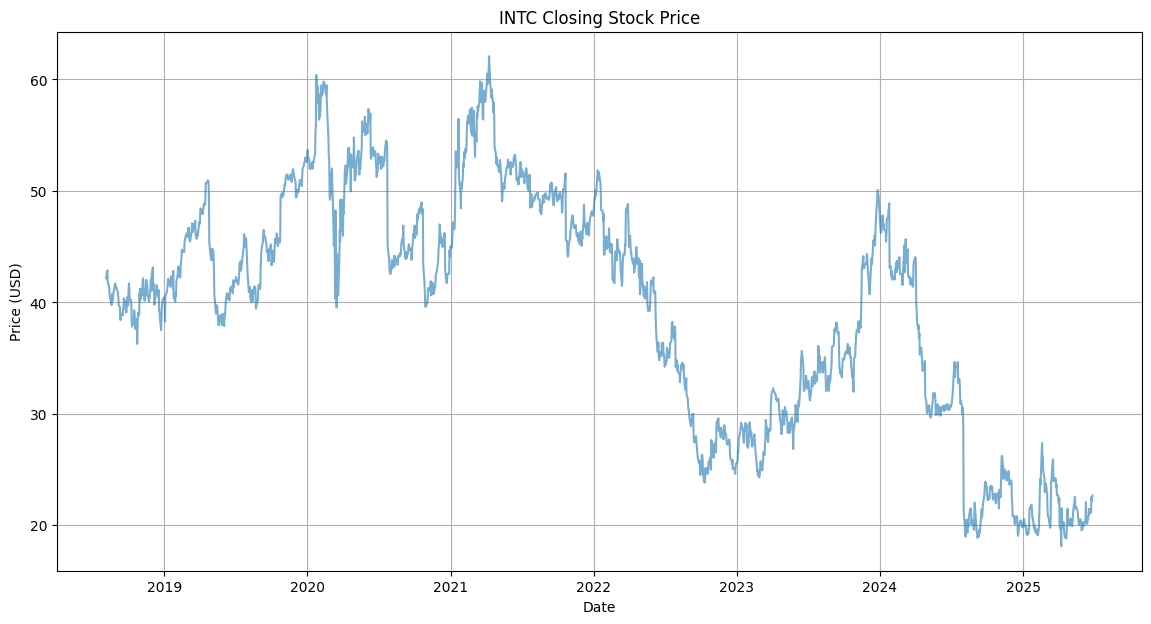

In [6]:
#Quick Closing Stock Price Visualization

plt.figure(figsize=(14, 7))

plt.plot(data['Close'], label='Close Price', alpha=0.6)
plt.title('INTC Closing Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

In [7]:
data['RSI'] = data['Close']
data[['MACD', 'MACDh', 'MACDs']] = macd(data['Close'], fast=12, slow=26, signal=9)
data[['Stoch_k', 'Stoch_d', 'Stoch_h']] = stoch(data['High'], data['Low'], data['Close'], k=14, d=3, smooth_k=3, append=True)
data['ROC'] = roc(data['Close'])
data[['ADX', 'ADX_s', 'DMP', 'DMN']] = adx(high = data['High'], low = data['Low'], close = data['Close'])
data.tail(20)

Close        Low       High        RSI  \
Date                                                                    
2025-05-30 00:00:00-04:00  19.549999  19.309999  20.260000  19.549999   
2025-06-02 00:00:00-04:00  19.740000  19.370001  19.820000  19.740000   
2025-06-03 00:00:00-04:00  20.290001  19.400000  20.410000  20.290001   
2025-06-04 00:00:00-04:00  20.250000  20.010000  20.500000  20.250000   
2025-06-05 00:00:00-04:00  19.990000  19.850000  20.549999  19.990000   
2025-06-06 00:00:00-04:00  20.059999  20.030001  20.440001  20.059999   
2025-06-09 00:00:00-04:00  20.480000  20.219999  20.959999  20.480000   
2025-06-10 00:00:00-04:00  22.080000  20.280001  22.440001  22.080000   
2025-06-11 00:00:00-04:00  20.680000  20.379999  21.830000  20.680000   
2025-06-12 00:00:00-04:00  20.770000  20.410000  20.980000  20.770000   
2025-06-13 00:00:00-04:00  20.139999  20.100000  20.600000  20.139999   
2025-06-16 00:00:00-04:00  20.740000  20.299999  20.930000  20.740000   
2025-06-17 00:00:00-04:00  20.799999  20.620001  21.480000  20.799999   
2025-06-18 00:00:00-04:00  21.490000  20.660000  21.600000  21.490000   
2025-06-20 00:00:00-04:00  21.080000  20.879999  21.889999  21.080000   
2025-06-23 00:00:00-04:00  21.190001  20.730000  21.580000  21.190001   
2025-06-24 00:00:00-04:00  22.549999  21.330000  22.690001  22.549999   
2025-06-25 00:00:00-04:00  22.200001  22.129999  22.770000  22.200001   
2025-06-26 00:00:00-04:00  22.500000  22.209999  22.620001  22.500000   
2025-06-27 00:00:00-04:00  22.690001  22.420000  23.379999  22.690001   

                               MACD     MACDh     MACDs    Stoch_k    Stoch_d  \
Date                                                                            
2025-05-30 00:00:00-04:00 -0.204103 -0.152510 -0.051594  10.630918  14.267141   
2025-06-02 00:00:00-04:00 -0.252133 -0.160431 -0.091701   9.770572  12.247860   
2025-06-03 00:00:00-04:00 -0.243014 -0.121050 -0.121964  16.626224  12.342571   
2025-06-04 00:00:00-04:00 -0.236292 -0.091462 -0.144830  27.174448  17.857081   
2025-06-05 00:00:00-04:00 -0.249073 -0.083395 -0.165678  32.411208  25.403960   
2025-06-06 00:00:00-04:00 -0.250664 -0.067989 -0.182676  32.816684  30.800780   
2025-06-09 00:00:00-04:00 -0.215550 -0.026300 -0.189250  36.837914  34.021935   
2025-06-10 00:00:00-04:00 -0.057948  0.105042 -0.162990  57.085674  42.246757   
2025-06-11 00:00:00-04:00 -0.045490  0.094000 -0.139490  60.899804  51.607797   
2025-06-12 00:00:00-04:00 -0.028032  0.089166 -0.117198  59.637917  59.207798   
2025-06-13 00:00:00-04:00 -0.064291  0.042326 -0.106617  38.977641  53.171787   
2025-06-16 00:00:00-04:00 -0.044103  0.050011 -0.094114  39.616613  46.077390   
2025-06-17 00:00:00-04:00 -0.022998  0.056893 -0.079891  39.936089  39.510114   
2025-06-18 00:00:00-04:00  0.048843  0.102987 -0.054144  54.313085  44.621929   
2025-06-20 00:00:00-04:00  0.071865  0.100807 -0.028942  57.650887  50.633353   
2025-06-23 00:00:00-04:00  0.097858  0.101441 -0.003582  61.410147  57.791373   
2025-06-24 00:00:00-04:00  0.225598  0.183344  0.042254  69.884090  62.981708   
2025-06-25 00:00:00-04:00  0.295188  0.202347  0.092841  78.143810  69.812682   
2025-06-26 00:00:00-04:00  0.370278  0.221950  0.148328  88.565269  78.864390   
2025-06-27 00:00:00-04:00  0.440046  0.233374  0.206672  83.196293  83.301791   

                             Stoch_h        ROC        ADX      ADX_s  \
Date                                                                    
2025-05-30 00:00:00-04:00  -3.636223  -9.280743   9.131414   8.821788   
2025-06-02 00:00:00-04:00  -2.477288  -8.864266   9.811563   9.105254   
2025-06-03 00:00:00-04:00   4.283653  -5.098215   9.609246   9.370330   
2025-06-04 00:00:00-04:00   9.317367  -4.795489   9.299836   9.555699   
2025-06-05 00:00:00-04:00   7.007248  -3.383281   9.212477   9.410862   
2025-06-06 00:00:00-04:00   2.015904  -2.384427   9.131359   9.215597   
2025-06-09 00:00:00-04:00   2.815978   2.144640   8.67593

Finally, let's generate the *output variable* for our analysis, the max high in the following 10 days.

In [8]:
data['rolling_high'] = data['High'].rolling(window=10).max()
data['rolling_high'] = data['rolling_high'].shift(-10)
data['Rolling High %'] = data['rolling_high'] / data['Close']

#2) Baseline Analysis

Initially, let's just see what the average rolling high percentage is.

In [9]:
_mean = data['Rolling High %'].mean()
_median = data['Rolling High %'].median()
_std = data['Rolling High %'].std()

print(f'Mean High Percentage: {_mean:0.4f}')
print(f'Median High Percentage: {_median:0.4f}')
print(f'Standard Deviation of Highs: {_std:0.4f}')

Mean High Percentage: 1.0573
Median High Percentage: 1.0430
Standard Deviation of Highs: 0.0582


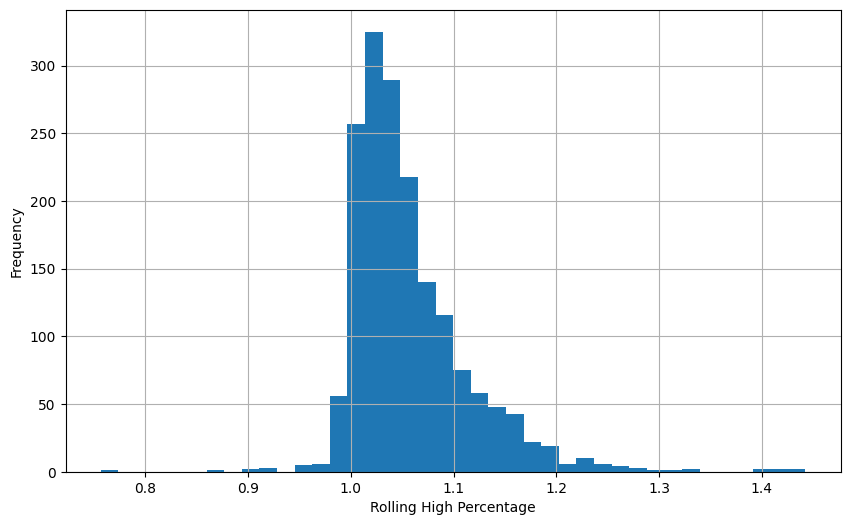

In [10]:
data['Rolling High %'].hist(bins=40, figsize=(10, 6))
plt.xlabel('Rolling High Percentage')
plt.ylabel('Frequency')
plt.show()

Looks like putting a sell order with a 4% premium on the close price is a good start. However, looking at the high standard deviation and the number of entries below 1 (corresponding to losses where the preference is to sell immediately), there is room for improvement.

#3) Momentum Indicator Analysis

##3.1) RSI

AI description of RSI "*The RSI measures the speed and change of price movements. It is used to determine if an asset is overbought (RSI > 70) or oversold (RSI < 30) and to identify potential price reversals.*"

For this indicator, I will label Upward momentum as points with RSI < 30, downward momentum as points with RSI > 70, and neutral as those in between.

I will then see how the segmentation impacts the median, mean, and standard deviation of the rolling high percentages.



In [11]:
data_rsi = data[['Close', 'Rolling High %', 'RSI']]

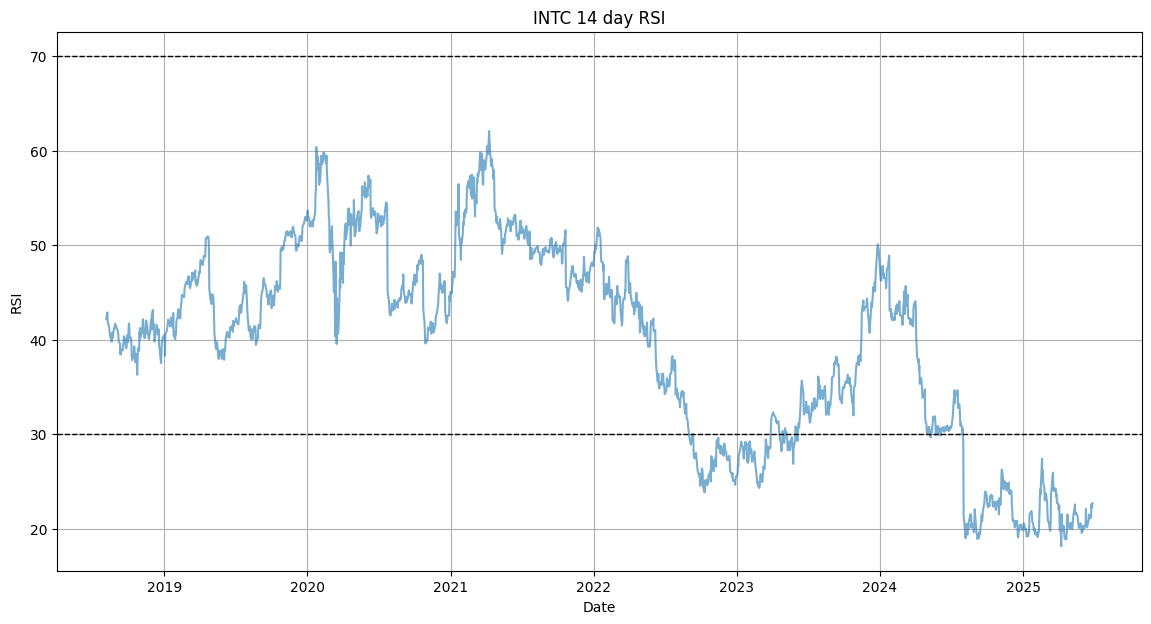

In [12]:
#Quick Visualization

plt.figure(figsize=(14, 7))

plt.plot(data['RSI'], label='RSI', alpha=0.6)
plt.axhline(70, lw=1, ls='--', c='k')
plt.axhline(30, lw=1, ls='--', c='k')
plt.title('INTC 14 day RSI')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.grid(True)
plt.show()

Well, there seems to be no point of Downward momentum "Over bought." Let still see about separating between neutral and upward momentum.

In [13]:
def assign_trend(row):
    if row['RSI'] >= 70:
        return 'Down'
    elif row['RSI'] < 30:
        return 'Up'
    else:
        return 'Neutral'

In [14]:
data_rsi['Signal'] = data.apply(assign_trend, axis=1)

In [15]:
print(len(data_rsi))
print(len(data_rsi[data_rsi['Signal']=='Up']))
print(len(data_rsi[data_rsi['Signal']=='Neutral']))
print(len(data_rsi[data_rsi['Signal']=='Down']))

1733
400
1333
0


In [16]:
data_up = data_rsi[data_rsi['Signal']=='Up']
data_neutral = data_rsi[data_rsi['Signal']=='Neutral']

In [17]:
_mean = data_up['Rolling High %'].mean()
_median = data_up['Rolling High %'].median()
_std = data_up['Rolling High %'].std()

print(f'Mean High Percentage: {_mean:0.4f}')
print(f'Median High Percentage: {_median:0.4f}')
print(f'Standard Deviation of Highs: {_std:0.4f}')

Mean High Percentage: 1.0854
Median High Percentage: 1.0674
Standard Deviation of Highs: 0.0806


In [18]:
_mean = data_neutral['Rolling High %'].mean()
_median = data_neutral['Rolling High %'].median()
_std = data_neutral['Rolling High %'].std()

print(f'Mean High Percentage: {_mean:0.4f}')
print(f'Median High Percentage: {_median:0.4f}')
print(f'Standard Deviation of Highs: {_std:0.4f}')

Mean High Percentage: 1.0490
Median High Percentage: 1.0384
Standard Deviation of Highs: 0.0467


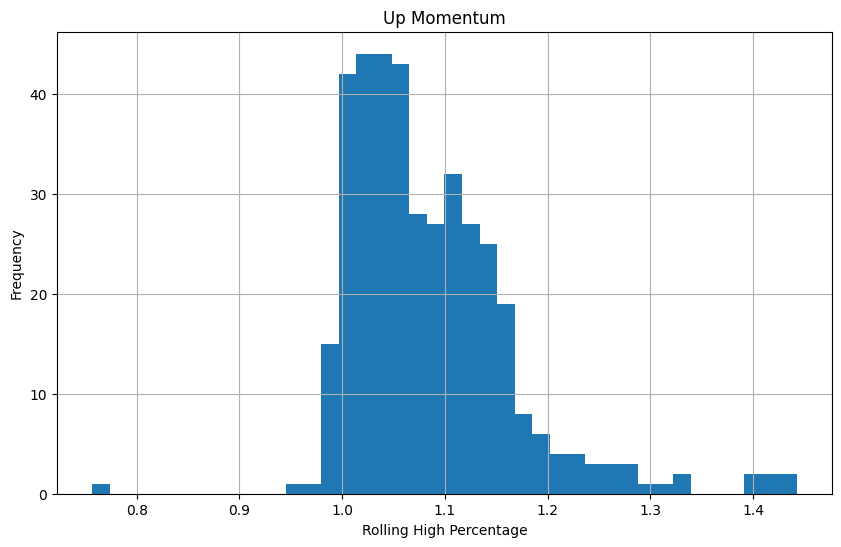

In [19]:
data_up['Rolling High %'].hist(bins=40, figsize=(10, 6))
plt.xlabel('Rolling High Percentage')
plt.ylabel('Frequency')
plt.title('Up Momentum')
plt.show()

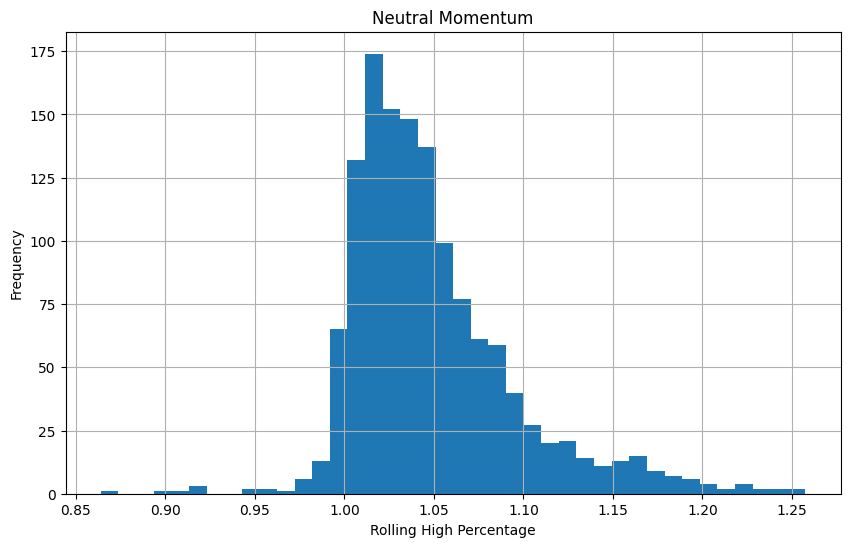

In [20]:
data_neutral['Rolling High %'].hist(bins=40, figsize=(10, 6))
plt.xlabel('Rolling High Percentage')
plt.ylabel('Frequency')
plt.title('Neutral Momentum')
plt.show()

RSI did help to differentiate, with the upward data set having a return 3% higher than the neutral. However, the standard deviations are still pretty high. Let's continue with MACD.

##3.2) MACD

AI description of MACD "The MACD compares two moving averages of a security's price to signal shifts in momentum and trend direction. It is used to identify bullish or bearish momentum shifts and potential trend continuations or reversals."

For this indicator, I will use the MACD histogram to distinguish between neutral, upward, and downward. Unfortunately, there is no clear guidance on what separates neutral and upward/downward (only that upward is above 0 and downward is below 0). I will look at a histogram of the values to see if there is visually a good separation point.

In [21]:
data_MACD = data[['Close', 'Rolling High %', 'MACD', 'MACDh', 'MACDs']]

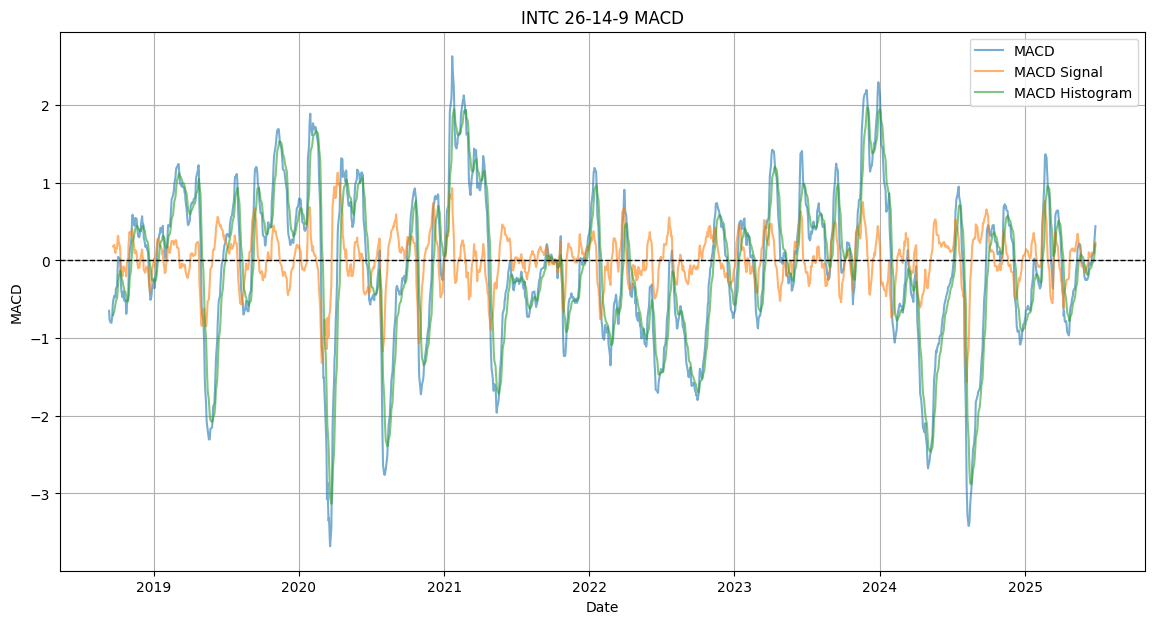

In [22]:
#Quick Visualization

plt.figure(figsize=(14, 7))

plt.plot(data_MACD[['MACD', 'MACDh', 'MACDs']], alpha=0.6)
plt.legend(['MACD', 'MACD Signal', 'MACD Histogram'])
plt.axhline(0, lw=1, ls='--', c='k')
plt.title('INTC 26-14-9 MACD')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.grid(True)
plt.show()

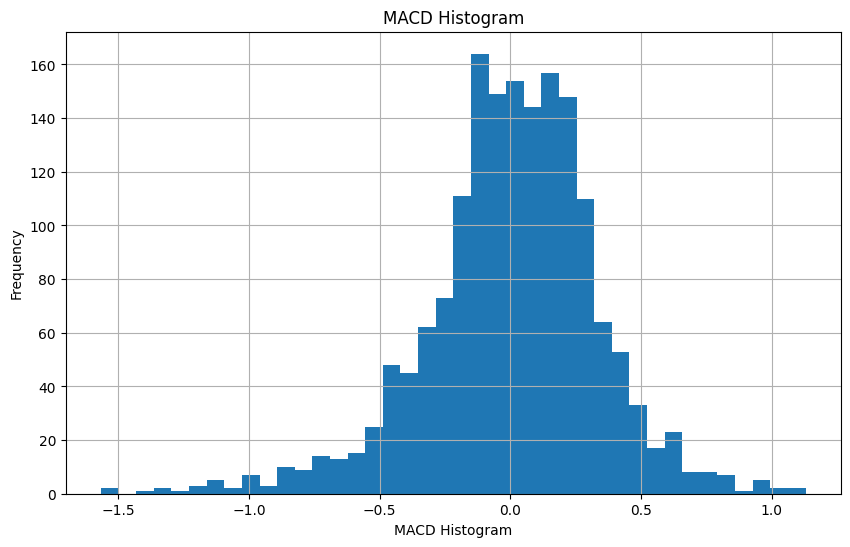

In [23]:
data_MACD['MACDh'].hist(bins=40, figsize=(10, 6))
plt.xlabel('MACD Histogram')
plt.ylabel('Frequency')
plt.title('MACD Histogram')
plt.show()

In [24]:
data_MACD['MACDh'].describe()

count    1700.000000
mean        0.002253
std         0.333680
min        -1.565794
25%        -0.161131
50%         0.021869
75%         0.209578
max         1.128676
Name: MACDh, dtype: float64

Let's use the standard deviation as the cut off point. Neutral momentum will be any point between -0.33 and 0.33.

In [25]:
def assign_trend(row):
    if row['MACDh'] <= -0.33:
        return 'Down'
    elif row['MACDh'] >= 0.33:
        return 'Up'
    else:
        return 'Neutral'

data_MACD['Signal'] = data.apply(assign_trend, axis=1)
data_MACD.head(100)

Close  Rolling High %      MACD     MACDh  \
Date                                                                       
2018-08-06 00:00:00-04:00  42.163277        1.026369       NaN       NaN   
2018-08-07 00:00:00-04:00  42.505390        1.018108       NaN       NaN   
2018-08-08 00:00:00-04:00  42.727737        1.012810       NaN       NaN   
2018-08-09 00:00:00-04:00  42.881680        0.982050       NaN       NaN   
2018-08-10 00:00:00-04:00  41.778419        1.007984       NaN       NaN   
...                              ...             ...       ...       ...   
2018-12-20 00:00:00-05:00  39.192696        1.054018 -0.170389 -0.262606   
2018-12-21 00:00:00-05:00  38.590263        1.071142 -0.313561 -0.324622   
2018-12-24 00:00:00-05:00  37.514473        1.114247 -0.507978 -0.415231   
2018-12-26 00:00:00-05:00  39.752098        1.053258 -0.476010 -0.306610   
2018-12-27 00:00:00-05:00  39.898396        1.063201 -0.433868 -0.211575   

                              MACDs   Signal  
Date                                          
2018-08-06 00:00:00-04:00       NaN  Neutral  
2018-08-07 00:00:00-04:00       NaN  Neutral  
2018-08-08 00:00:00-04:00       NaN  Neutral  
2018-08-09 00:00:00-04:00       NaN  Neutral  
2018-08-10 00:00:00-04:00       NaN  Neutral  
...                             ...      ...  
2018-12-20 00:00:00-05:00  0.092217  Neutral  
2018-12-21 00:00:00-05:00  0.011061  Neutral  
2018-12-24 00:00:00-05:00 -0.092747     Down  
2018-12-26 00:00:00-05:00 -0.169399  Neutral  
2018-12-27 00:00:00-05:00 -0.222293  Neutral  

[100 rows x 6 columns]

In [26]:
print(len(data_MACD))
data_up = data_MACD[data_MACD['Signal']=='Up']
data_neutral = data_MACD[data_MACD['Signal']=='Neutral']
data_down = data_MACD[data_MACD['Signal']=='Down']
print(len(data_up))
print(len(data_neutral))
print(len(data_down))

1733
213
1294
226


In [27]:
_mean = data_up['Rolling High %'].mean()
_median = data_up['Rolling High %'].median()
_std = data_up['Rolling High %'].std()

print(f'Upward Mean High Percentage: {_mean:0.4f}')
print(f'Upward Median High Percentage: {_median:0.4f}')
print(f'Upward Standard Deviation of Highs: {_std:0.4f}')

Upward Mean High Percentage: 1.0505
Upward Median High Percentage: 1.0361
Upward Standard Deviation of Highs: 0.0507


In [28]:
_mean = data_neutral['Rolling High %'].mean()
_median = data_neutral['Rolling High %'].median()
_std = data_neutral['Rolling High %'].std()

print(f'Neutral Mean High Percentage: {_mean:0.4f}')
print(f'Neutral Median High Percentage: {_median:0.4f}')
print(f'Neutral Standard Deviation of Highs: {_std:0.4f}')

Neutral Mean High Percentage: 1.0587
Neutral Median High Percentage: 1.0443
Neutral Standard Deviation of Highs: 0.0579


In [29]:
_mean = data_down['Rolling High %'].mean()
_median = data_down['Rolling High %'].median()
_std = data_down['Rolling High %'].std()

print(f'Downward Mean High Percentage: {_mean:0.4f}')
print(f'Downward Median High Percentage: {_median:0.4f}')
print(f'Downward Standard Deviation of Highs: {_std:0.4f}')

Downward Mean High Percentage: 1.0557
Downward Median High Percentage: 1.0430
Downward Standard Deviation of Highs: 0.0656


MACD Histogram did not help separate the performance.

## 3.3) Stochastic Oscillator

AI description of Stoch "This indicator compares a security's closing price to its price range over a specific period. It is used to forecast potential trend reversals and identify overbought and oversold conditions."

For this, I will use 80 as the downward cutoff and 20 as the upward cutoff.


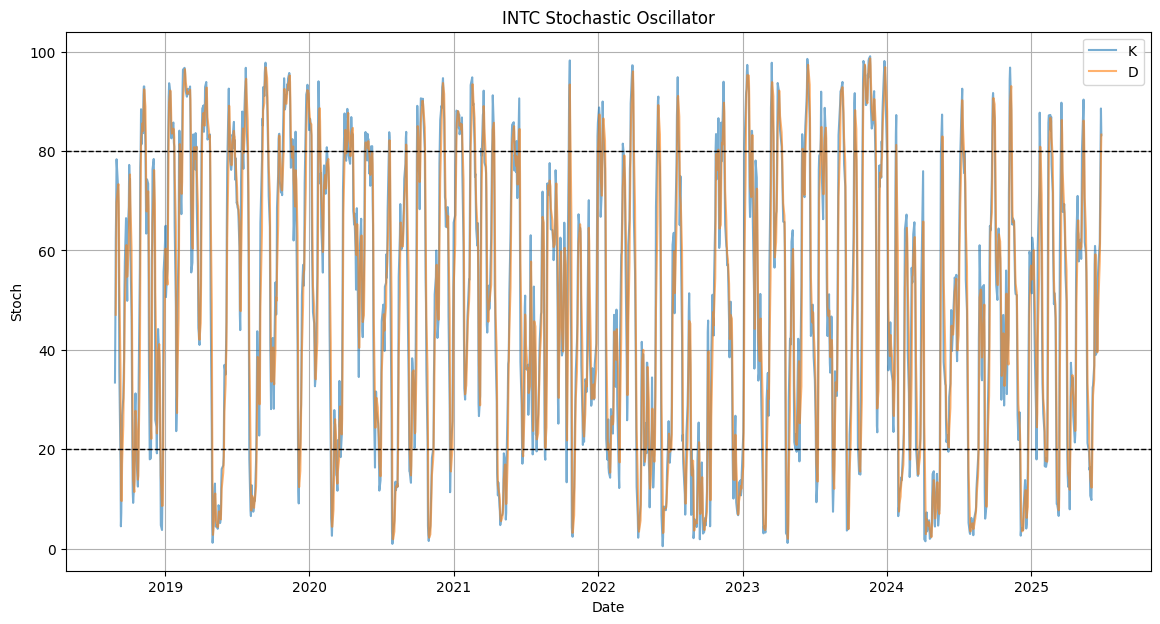

In [30]:
data_stoch = data[['Close', 'Rolling High %', 'Stoch_k', 'Stoch_d', 'Stoch_h']]

#Quick Visualization

plt.figure(figsize=(14, 7))

plt.plot(data_stoch[['Stoch_k', 'Stoch_d']], alpha=0.6)
plt.legend(['K', 'D'])
plt.axhline(80, lw=1, ls='--', c='k')
plt.axhline(20, lw=1, ls='--', c='k')
plt.title('INTC Stochastic Oscillator')
plt.xlabel('Date')
plt.ylabel('Stoch')
plt.grid(True)
plt.show()

In [31]:
def assign_trend(row):
    if row['Stoch_k'] >= 80:
        return 'Down'
    elif row['Stoch_k'] <= 20:
        return 'Up'
    else:
        return 'Neutral'

data_stoch['Signal'] = data.apply(assign_trend, axis=1)

data_up = data_stoch[data_stoch['Signal']=='Up']
data_neutral = data_stoch[data_stoch['Signal']=='Neutral']
data_down = data_stoch[data_stoch['Signal']=='Down']
print(len(data_up))
print(len(data_neutral))
print(len(data_down))

356
1041
336


In [32]:
_mean = data_up['Rolling High %'].mean()
_median = data_up['Rolling High %'].median()
_std = data_up['Rolling High %'].std()

print(f'Upward Mean High Percentage: {_mean:0.4f}')
print(f'Upward Median High Percentage: {_median:0.4f}')
print(f'Upward Standard Deviation of Highs: {_std:0.4f}')

Upward Mean High Percentage: 1.0623
Upward Median High Percentage: 1.0453
Upward Standard Deviation of Highs: 0.0727


In [33]:
_mean = data_neutral['Rolling High %'].mean()
_median = data_neutral['Rolling High %'].median()
_std = data_neutral['Rolling High %'].std()

print(f'Neutral Mean High Percentage: {_mean:0.4f}')
print(f'Neutral Median High Percentage: {_median:0.4f}')
print(f'Neutral Standard Deviation of Highs: {_std:0.4f}')

Neutral Mean High Percentage: 1.0592
Neutral Median High Percentage: 1.0454
Neutral Standard Deviation of Highs: 0.0548


In [34]:
_mean = data_down['Rolling High %'].mean()
_median = data_down['Rolling High %'].median()
_std = data_down['Rolling High %'].std()

print(f'Downward Mean High Percentage: {_mean:0.4f}')
print(f'Downward Median High Percentage: {_median:0.4f}')
print(f'Downward Standard Deviation of Highs: {_std:0.4f}')

Downward Mean High Percentage: 1.0459
Downward Median High Percentage: 1.0333
Downward Standard Deviation of Highs: 0.0491


While the downward signal help to identify the lower performers, the upward signal was not useful.

## 3.4) Rate of Change

The ROC measures the percentage change in price between the current price and a price from a certain number of periods ago. It can confirm trends, identify price surges or drops, and signal overbought/oversold conditions.

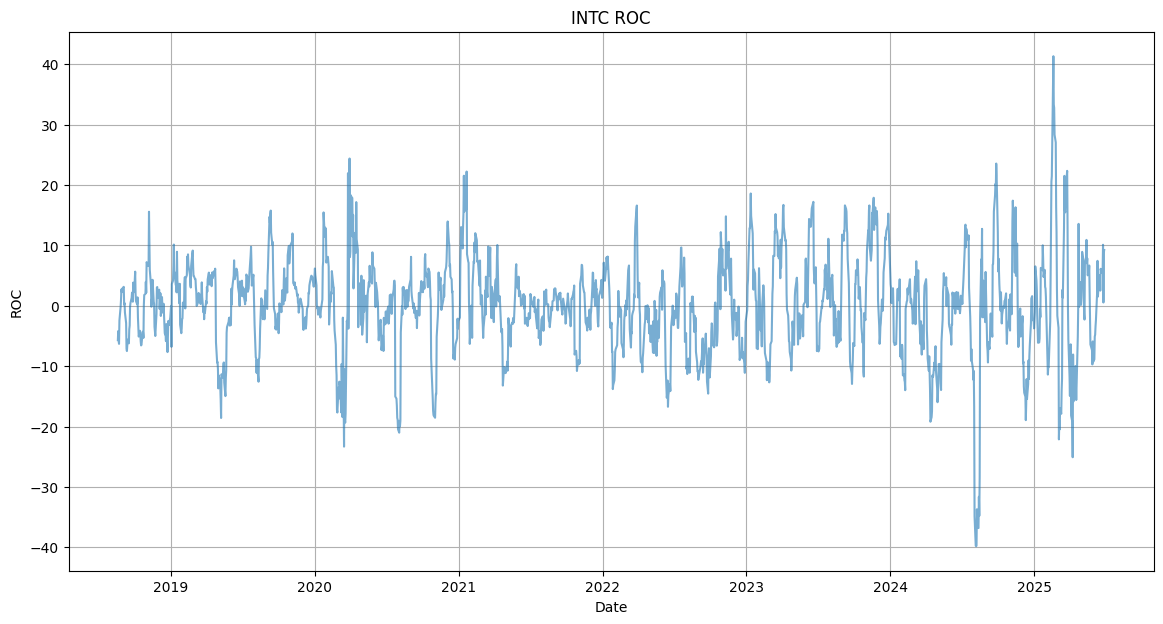

In [35]:
data_roc = data[['Close', 'Rolling High %', 'ROC']]

#Quick Visualization

plt.figure(figsize=(14, 7))

plt.plot(data_roc['ROC'], alpha=0.6)
plt.title('INTC ROC')
plt.xlabel('Date')
plt.ylabel('ROC')
plt.grid(True)
plt.show()

In [36]:
data['ROC'].describe()

count    1723.000000
mean       -0.044809
std         8.065740
min       -39.817908
25%        -4.173308
50%         0.228599
75%         4.339471
max        41.331272
Name: ROC, dtype: float64

I will use a cutoff of 4 to distinguish between upward, downward, and neutral positions

In [37]:
def assign_trend(row):
    if row['ROC'] <= -4:
        return 'Down'
    elif row['ROC'] >= 4:
        return 'Up'
    else:
        return 'Neutral'

data_roc['Signal'] = data.apply(assign_trend, axis=1)

data_up = data_roc[data_roc['Signal']=='Up']
data_neutral = data_roc[data_roc['Signal']=='Neutral']
data_down = data_roc[data_roc['Signal']=='Down']
print(len(data_up))
print(len(data_neutral))
print(len(data_down))

454
836
443


In [38]:
_mean = data_up['Rolling High %'].mean()
_median = data_up['Rolling High %'].median()
_std = data_up['Rolling High %'].std()

print(f'Upward Mean High Percentage: {_mean:0.4f}')
print(f'Upward Median High Percentage: {_median:0.4f}')
print(f'Upward Standard Deviation of Highs: {_std:0.4f}')

Upward Mean High Percentage: 1.0529
Upward Median High Percentage: 1.0361
Upward Standard Deviation of Highs: 0.0538


In [39]:
_mean = data_neutral['Rolling High %'].mean()
_median = data_neutral['Rolling High %'].median()
_std = data_neutral['Rolling High %'].std()

print(f'Neutral Mean High Percentage: {_mean:0.4f}')
print(f'Neutral Median High Percentage: {_median:0.4f}')
print(f'Neutral Standard Deviation of Highs: {_std:0.4f}')

Neutral Mean High Percentage: 1.0550
Neutral Median High Percentage: 1.0427
Neutral Standard Deviation of Highs: 0.0509


In [40]:
_mean = data_down['Rolling High %'].mean()
_median = data_down['Rolling High %'].median()
_std = data_down['Rolling High %'].std()

print(f'Downward Mean High Percentage: {_mean:0.4f}')
print(f'Downward Median High Percentage: {_median:0.4f}')
print(f'Downward Standard Deviation of Highs: {_std:0.4f}')

Downward Mean High Percentage: 1.0660
Downward Median High Percentage: 1.0485
Downward Standard Deviation of Highs: 0.0728


No good classification for the ROC

##3.5) ADX

The ADX line rises when a trend is gaining strength and falls when momentum is weakening. To determine whether the momentum is bullish or bearish, the ADX is used in conjunction with the two directional movement indicator (DMI) lines: the Positive Directional Indicator (+DI) and the Negative Directional Indicator (-DI).

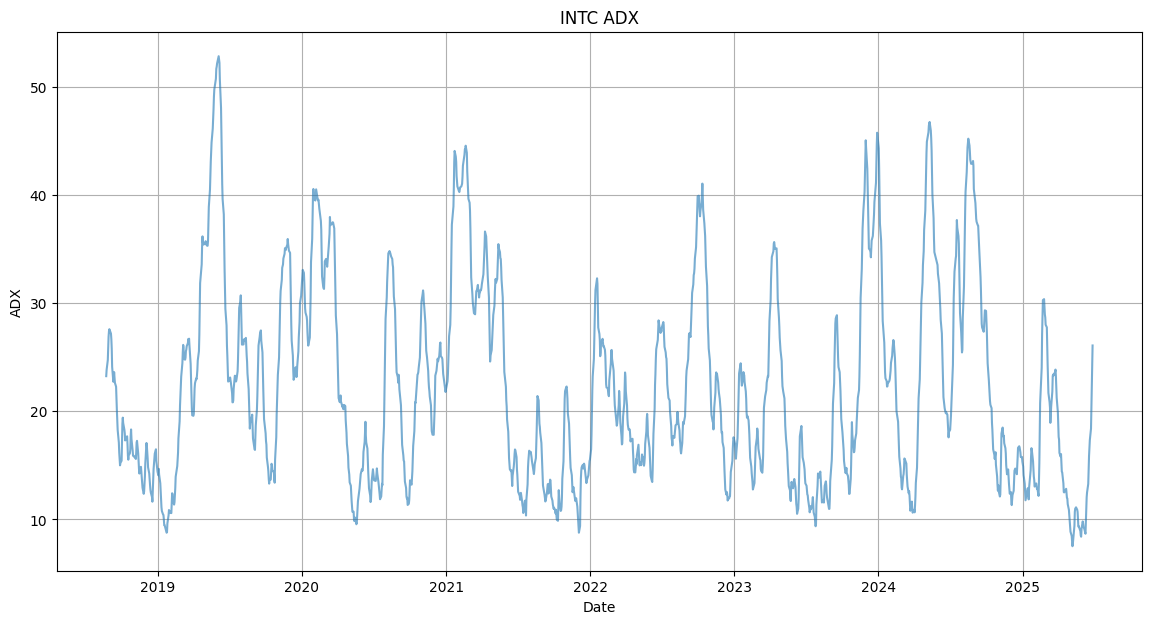

In [41]:
data_adx = data[['Close', 'Rolling High %', 'ADX', 'DMP', 'DMN']]

#Quick Visualization

plt.figure(figsize=(14, 7))

plt.plot(data_adx[['ADX']], alpha=0.6)
plt.title('INTC ADX')
plt.xlabel('Date')
plt.ylabel('ADX')
plt.grid(True)
plt.show()

In [42]:
def assign_trend(row):
    if row['ADX'] >= 25:
      if row['DMP'] >= row['DMN']:
        return 'Up'
      else:
        return 'Down'
    else:
        return 'Neutral'

data_adx['Signal'] = data.apply(assign_trend, axis=1)

data_up = data_roc[data_adx['Signal']=='Up']
data_neutral = data_adx[data_adx['Signal']=='Neutral']
data_down = data_adx[data_adx['Signal']=='Down']
print(len(data_up))
print(len(data_neutral))
print(len(data_down))

294
1153
286


In [43]:
_mean = data_up['Rolling High %'].mean()
_median = data_up['Rolling High %'].median()
_std = data_up['Rolling High %'].std()

print(f'Upward Mean High Percentage: {_mean:0.4f}')
print(f'Upward Median High Percentage: {_median:0.4f}')
print(f'Upward Standard Deviation of Highs: {_std:0.4f}')

Upward Mean High Percentage: 1.0490
Upward Median High Percentage: 1.0313
Upward Standard Deviation of Highs: 0.0513


In [44]:
_mean = data_neutral['Rolling High %'].mean()
_median = data_neutral['Rolling High %'].median()
_std = data_neutral['Rolling High %'].std()

print(f'Neutral Mean High Percentage: {_mean:0.4f}')
print(f'Neutral Median High Percentage: {_median:0.4f}')
print(f'Neutral Standard Deviation of Highs: {_std:0.4f}')

Neutral Mean High Percentage: 1.0606
Neutral Median High Percentage: 1.0458
Neutral Standard Deviation of Highs: 0.0600


In [45]:
_mean = data_down['Rolling High %'].mean()
_median = data_down['Rolling High %'].median()
_std = data_down['Rolling High %'].std()

print(f'Downward Mean High Percentage: {_mean:0.4f}')
print(f'Downward Median High Percentage: {_median:0.4f}')
print(f'Downward Standard Deviation of Highs: {_std:0.4f}')

Downward Mean High Percentage: 1.0524
Downward Median High Percentage: 1.0422
Downward Standard Deviation of Highs: 0.0566


ADX doesn't provide any separation of the returns

Of the five technical indicators, the best performing seem to be the RSI and the stochastic oscillator. Since each one performed well on one side (RSI for upward trends and stoch for downward trends), I will see if combining them will improve the performance.

##3.6) RSI and Stochastic Oscillator

In [46]:
data_combo = data_rsi

In [47]:
data_combo['Signal_stoch'] = data_stoch['Signal']

In [48]:
table = pd.crosstab(data_combo['Signal'], data_combo['Signal_stoch'])
print("Crosstab (Count):")
print(table)

Crosstab (Count):
Signal_stoch  Down  Neutral   Up
Signal                          
Neutral        289      800  244
Up              47      241  112


In [49]:
table = pd.crosstab(data_combo['Signal'], data_combo['Signal_stoch'], values=data_combo['Rolling High %'], aggfunc='mean')
print("Crosstab (Average 10 day max high):")
print(table)

Crosstab (Average 10 day max high):
Signal_stoch      Down   Neutral        Up
Signal                                    
Neutral       1.045966  1.051684  1.044017
Up            1.045774  1.085120  1.101993


In [50]:
table = pd.crosstab(data_combo['Signal'], data_combo['Signal_stoch'], values=data_combo['Rolling High %'], aggfunc='median')
print("Crosstab (Median 10 day max high):")
print(table)

Crosstab (Median 10 day max high):
Signal_stoch      Down   Neutral        Up
Signal                                    
Neutral       1.032861  1.040138  1.039599
Up            1.035666  1.069826  1.080496


In [51]:
table = pd.crosstab(data_combo['Signal'], data_combo['Signal_stoch'], values=data_combo['Rolling High %'], aggfunc='std')
print("Crosstab (Standard Deviation 10 day max high):")
print(table)

Crosstab (Standard Deviation 10 day max high):
Signal_stoch      Down   Neutral        Up
Signal                                    
Neutral       0.049436  0.047560  0.039448
Up            0.047551  0.068584  0.105602


The combindation of the two indicatiors seems to have help. If the RSI is showing an upward trend and the Stochastic Oscillator is not showing downward (upward or neutral), there seems to be higher possible returns than for the remaining combinations. This has potential to test it with the unseen data in the future (I will wait until the end of the year to give it about 126 data points (half a year).

#4) Machine Learning

Let's see if any further insight can be gained from machine learning algorithms. In the end, I would like to still have some interpretable results. Therefore, I will stick with decision tree, random forest, and XGBoost algorithms to test. Decision tree will have a final visualization we can look at while the random forest and XGBoost we will mostly use to see the relative order of feature importance.

##4.1) Decision Tree

In [52]:
#Library Import

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree

In [53]:
data_clean = data.dropna()
features = ['RSI', 'MACDh', 'Stoch_k', 'Stoch_d', 'Stoch_h', 'ROC', 'ADX', 'ADX_s', 'DMP', 'DMN']
objective = ['Rolling High %']

X = data_clean[features]
y = data_clean[objective]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [55]:
y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test, y_pred)
print(f"R2: {r2}")

Mean Squared Error: 0.00270067498311426
R2: 0.2676761976268732


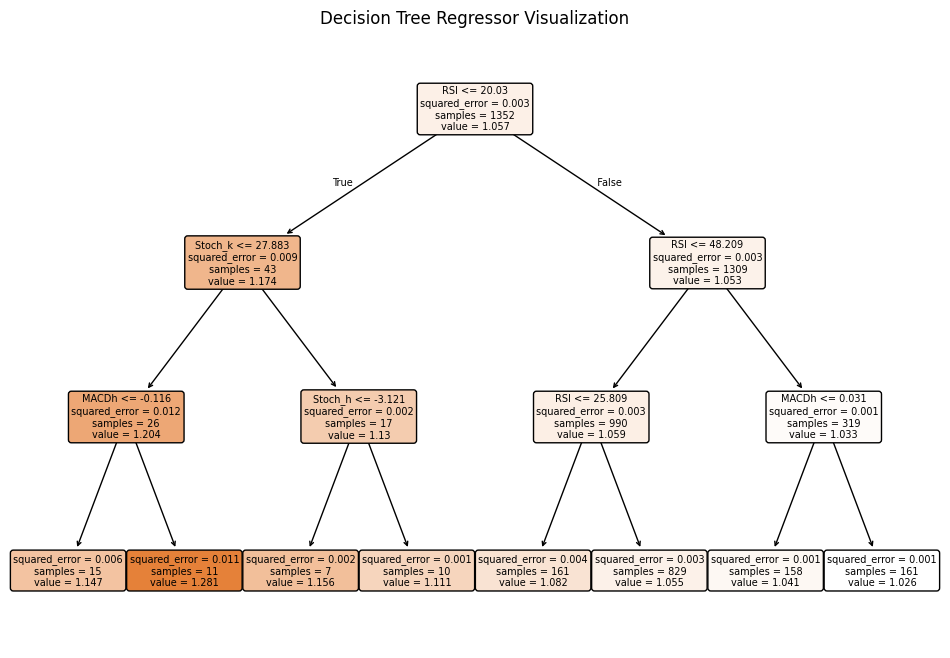

In [56]:
#Decision Tree Visualization

plt.figure(figsize=(12, 8)) # Adjust figure size for better readability
plot_tree(regressor, filled=True, feature_names=features, rounded=True)
plt.title("Decision Tree Regressor Visualization")
plt.show()

Well, for the top performing groups, the decision tree also separated them using the Stochastic and RSI (although they switched the cutoff between the two to roughly 30 and 20 respectively. On the low performing side, it looks like a MACD below 0 signals the downward trend section.

##4.2) Random Forest

In [57]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error: 0.0018319961475055085


In [58]:
importances = rf_regressor.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)[::-1] # Sort in descending order

print("Feature Importances:")
for i in sorted_indices:
    print(f"{feature_names[i]}: {importances[i]:.4f}")

Feature Importances:
RSI: 0.3146
DMP: 0.1097
DMN: 0.0993
ROC: 0.0846
MACDh: 0.0803
Stoch_h: 0.0719
Stoch_d: 0.0700
Stoch_k: 0.0590
ADX: 0.0562
ADX_s: 0.0545


##4.3) XGBoost

In [59]:
reg = xgb.XGBRegressor(n_estimators=5000, early_stopping_rounds=50, learning_rate = 0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:0.05766	validation_1-rmse:0.06076
[100]	validation_0-rmse:0.04303	validation_1-rmse:0.05035
[200]	validation_0-rmse:0.03610	validation_1-rmse:0.04768
[300]	validation_0-rmse:0.03189	validation_1-rmse:0.04640
[400]	validation_0-rmse:0.02812	validation_1-rmse:0.04513
[500]	validation_0-rmse:0.02600	validation_1-rmse:0.04472
[600]	validation_0-rmse:0.02427	validation_1-rmse:0.04435
[700]	validation_0-rmse:0.02240	validation_1-rmse:0.04412
[800]	validation_0-rmse:0.02072	validation_1-rmse:0.04405
[900]	validation_0-rmse:0.01871	validation_1-rmse:0.04378
[1000]	validation_0-rmse:0.01706	validation_1-rmse:0.04346
[1100]	validation_0-rmse:0.01590	validation_1-rmse:0.04341
[1200]	validation_0-rmse:0.01427	validation_1-rmse:0.04318
[1300]	validation_0-rmse:0.01321	validation_1-rmse:0.04309
[1372]	validation_0-rmse:0.01268	validation_1-rmse:0.04306


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=5000,
             n_jobs=None, num_parallel_tree=None, ...)

In [60]:
fi = pd.DataFrame(reg.feature_importances_,
             index = reg.feature_names_in_,
             columns=['importance']).sort_values('importance')

print(fi)

         importance
Stoch_h    0.062621
ADX        0.088518
Stoch_k    0.089050
MACDh      0.089672
ADX_s      0.090524
ROC        0.095911
Stoch_d    0.097947
DMN        0.104419
DMP        0.120347
RSI        0.160990


In both instances, RSI was the most important with DMP and DMN in the next three.

## 5) RSI/Stoch Redo

Based on the decision tree result above, I wanted to redo the RSI/Stochastic Oscillator result with the new cutoff or oversold/upward momentum.

In [63]:
def assign_trend_stoch(row):
    if row['Stoch_k'] >= 80:
        return 'Down'
    elif row['Stoch_k'] <= 30: #New cutoff (originally 20)
        return 'Up'
    else:
        return 'Neutral'

def assign_trend_rsi(row):
    if row['RSI'] >= 70:
        return 'Down'
    elif row['RSI'] < 20: #New cutoff (originally 30)
        return 'Up'
    else:
        return 'Neutral'

data_combo['Signal_stoch'] = data.apply(assign_trend_stoch, axis=1)
data_combo['Signal_rsi'] = data.apply(assign_trend_rsi, axis=1)

table = pd.crosstab(data_combo['Signal_rsi'], data_combo['Signal_stoch'])
print("Crosstab (Count):")
print(table)

Crosstab (Count):
Signal_stoch  Down  Neutral   Up
Signal_rsi                      
Neutral        336      863  482
Up               0       15   37


In [65]:
table = pd.crosstab(data_combo['Signal_rsi'], data_combo['Signal_stoch'], values=data_combo['Rolling High %'], aggfunc='mean')
print("Crosstab (Average 10 day max high):")
print(table)

Crosstab (Average 10 day max high):
Signal_stoch     Down   Neutral        Up
Signal_rsi                               
Neutral       1.04594  1.056494  1.053056
Up                NaN  1.124915  1.205262


In [68]:
table = pd.crosstab(data_combo['Signal_rsi'], data_combo['Signal_stoch'], values=data_combo['Rolling High %'], aggfunc='median')
print("Crosstab (Median 10 day max high):")
print(table)

Crosstab (Median 10 day max high):
Signal_stoch      Down   Neutral        Up
Signal_rsi                                
Neutral       1.033294  1.043275  1.043035
Up                 NaN  1.127831  1.163918


In [69]:
table = pd.crosstab(data_combo['Signal_rsi'], data_combo['Signal_stoch'], values=data_combo['Rolling High %'], aggfunc='std')
print("Crosstab (Standard Deviation 10 day max high):")
print(table)

Crosstab (Standard Deviation 10 day max high):
Signal_stoch      Down   Neutral        Up
Signal_rsi                                
Neutral       0.049116  0.052023  0.051720
Up                 NaN  0.029711  0.116514


Looking at the count crosstab, it looks like the improvement in separation is due to the higher cutoff for RSI upward momentum.

##6) Conclusion

After performing this analysis, I will start using the RSI indicator in deciding when I should sell my stock. The ADX DMP and DMI indicators also look like they might be useful in determining the direction of movement, although the ADX indicator didn't provide much additional information according to the random forest and XGBoost results. I want to return to this after the end of 2025 so I can test some of the strategies proposed here and see how they would perform in real life conditions.